<a href="https://www.kaggle.com/code/danishshaikh18/post-covid-impact-on-student-mental-health?scriptVersionId=252298586" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 🧠 Mental Health in Students Post-COVID: A Silent Crisis?
#### 📊 Preprocessing Notebook + Exploratory Data Analysis (EDA)


> *"The classrooms reopened, but something never quite returned."*  
> *"Smiles came back, but the silence grew louder."*

The COVID-19 pandemic reshaped the world in ways we are still trying to understand—and among its most silent victims were **students**. Behind the return to academic routine lies a shadow crisis: **increased anxiety, depression, sleep disorders, and even suicidal thoughts**. This project aims to explore and analyze the **mental health impact on students post-COVID**, using real-world data that includes psychological, academic, lifestyle, and demographic variables.

Through this notebook, we will:
- 🧹 Perform **data preprocessing** to clean and shape the dataset.
- 📊 Conduct **exploratory data analysis (EDA)** to uncover patterns, correlations, and warning signs.
- 🎯 Use visualizations that not only highlight trends, but **tell the story of students' struggles** in a post-pandemic world.

This is not just a statistical exercise — it's an attempt to quantify a **crisis hidden in plain sight**.

Let’s begin.

# 🔧Imports
Below are the necessary libraries required for data handling, visualization, and basic preprocessing.


In [1]:
# 📦 Basic Imports
import numpy as np
import pandas as pd

# 📊 Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# 🛠️ Display Settings
plt.style.use('ggplot')
sns.set_palette('Set2')
import warnings
warnings.filterwarnings('ignore')

# 🧠 Optional: For interactive visuals (if you plan to add later)
# import plotly.express as px
# import cufflinks as cf
# cf.go_offline()

# 🧹 For Preprocessing
from sklearn.preprocessing import LabelEncoder


# 📂Loading and Combining Datasets

We are working with **two publicly available datasets** focused on student mental health after pandemic.  
Both datasets have nearly identical structures, but we ensured consistency by applying minor modifications before merging them into a single dataframe.

> Final merged dataset will be the foundation of all our preprocessing and analysis.


In [2]:
# Load the first cleaned dataset (already preprocessed and saved)
df1 = pd.read_excel(r'/kaggle/input/required-datasets/final_depression_dataset_2.xlsx')

# Load the second dataset which had original raw data
df2 = pd.read_excel(r'/kaggle/input/required-datasets/student_depression_dataset.xlsx')

Modifications of both datasets before merging

In [3]:
#Drop unnecessary columns from both datasets
# These columns are not needed for our analysis and visualization
df1 = df1.drop(columns=['Profession', 'Work Pressure', 'Job Satisfaction'])
df2 = df2.drop(columns=['Profession', 'Work Pressure', 'Job Satisfaction'])

In [4]:
#Renaming columns for consistency
# This ensures both datasets have the same column names for merging
df1 = df1.rename(columns={'Have you ever had suicidal thoughts ?': 'Suicidal Thoughts',
                        'Work/Study Hours': 'Study Hours',})
df2 = df2.rename(columns={'Have you ever had suicidal thoughts ?': 'Suicidal Thoughts',
                        'Work/Study Hours': 'Study Hours',})

Merge both DataFrames

In [5]:
#Merged both DataFrames using pd.concat
# This combines the two datasets into a single DataFrame for analysis
merged_df = pd.concat([df1, df2], ignore_index=True)

You can view your new Dataframe information 

In [6]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28403 entries, 0 to 28402
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Gender                            28403 non-null  object 
 1   Age                               28403 non-null  int64  
 2   City                              28403 non-null  object 
 3   Academic Pressure                 28403 non-null  int64  
 4   CGPA                              28403 non-null  float64
 5   Study Satisfaction                28403 non-null  int64  
 6   Sleep Duration                    28403 non-null  object 
 7   Dietary Habits                    28403 non-null  object 
 8   Degree                            28403 non-null  object 
 9   Suicidal Thoughts                 28403 non-null  object 
 10  Study Hours                       28403 non-null  int64  
 11  Financial Stress                  28403 non-null  object 
 12  Fami

We will see how our new DataFrame is looking 

In [7]:
merged_df.head(5)

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Suicidal Thoughts,Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,28,Varanasi,2,6.51,4,7-8 hours,Moderate,BA,Yes,9,2,Yes,No
1,Male,28,Bangalore,4,7.48,5,5-6 hours,Healthy,MD,Yes,7,1,Yes,No
2,Male,25,Rajkot,1,7.21,3,5-6 hours,Unhealthy,MBBS,Yes,10,4,No,Yes
3,Male,23,Mumbai,1,9.90,4,More than 8 hours,Unhealthy,MSc,Yes,7,2,Yes,No
4,Female,31,Vadodara,1,5.97,5,More than 8 hours,Healthy,LLM,Yes,4,2,Yes,No


# 🧹 Data Preprocessing & Normalization

Before we dive into exploratory analysis, we will perform essential preprocessing steps and normalize categorical column values to ensure consistency and enhance the clarity of our visualizations.


Convert Male/Female to M/F

In [8]:
#Using map function to convert Male/Female to M/F
# This creates cleaner labels for plots and improves readability in visual analysis
merged_df['Gender'] = merged_df['Gender'].map({'Male' : 'M' , 'Female':'F'})

#### Convert All columns who has Yes/No to 1/0
Converting to 1/0 simplifies analysis and makes the data ready for statistical and machine learning models.

In [9]:
#We will create a list of columns that have Yes/No values
# Converting these columns to 1/0 for easier analysis
lst = ['Suicidal Thoughts' , 'Family History of Mental Illness' , 'Depression']

#Using loop to iterate through the list and map Yes/No to 1/0
# This simplifies the data for statistical analysis and visualization
for columns in lst:
    merged_df[columns] = merged_df[columns].map({'Yes': '1', 'No': '0'})

In [10]:
merged_df['Sleep Duration'].value_counts()
#You can see here due to comma we have repeated values in different formats
#We will remove those commas to make it consistent
#Then we will convert the column to numeric type for better analysis

Sleep Duration
'Less than 5 hours'    8310
'7-8 hours'            7346
'5-6 hours'            6183
'More than 8 hours'    6044
7-8 hours               128
More than 8 hours       128
5-6 hours               123
Less than 5 hours       123
Others                   18
Name: count, dtype: int64

Convert Sleep Duration into numeric

In [11]:
#we will create a mapping dictionary to convert sleep duration strings to numeric values
mapping = {
    '5-6 hours': 5.5,
    "'5-6 hours'": 5.5,
    '7-8 hours': 7.5,
    "'7-8 hours'": 7.5,
    'More than 8 hours': 9,
    "'More than 8 hours'": 9,
    'Less than 5 hours': 4.5,
    "'Less than 5 hours'": 4.5,
    'Others': np.nan  # You can impute or drop later
}

#By using the map function and mapping dict, we can convert the 'Sleep Duration' column to numeric values
merged_df['Sleep Duration'] = merged_df['Sleep Duration'].map(mapping)

We have 18 Null Values due to Other 

In [12]:
merged_df['Sleep Duration'].isnull().sum()

18

In [13]:
#Using fillna to handle missing values in 'Sleep Duration'
# This replaces NaN values with the mean of the column for better analysis
merged_df['Sleep Duration'].fillna(merged_df['Sleep Duration'].mean(), inplace=True)

In [14]:
#Now you can check the number of null values in 'Sleep Duration' again
merged_df['Sleep Duration'].isnull().sum()

0

Convert Healthy, Moderate and Unhealthy into Numeric values for better analysis

In [15]:
#Convert Healthy, Moderate and Unhealthy into Numeric values for better analysis
# This will help in statistical analysis and visualization
merged_df['Dietary Habits'] = merged_df['Dietary Habits'].map({'Healthy':'2' , 'Unhealthy':'0' , 'Moderate':'1'})

Delete Rows who's Age is Greater than 27 for focusing on Student Age

In [16]:
merged_df = merged_df[merged_df['Age'] < 28]

Removing Invalid City Rows

In [17]:
#When you see there are some rows who doesn't have a valid city name
# We will remove those rows to focus on valid city data
merged_df['City'].value_counts()

City
Kalyan           947
Hyderabad        846
Srinagar         780
Vasai-Virar      761
Agra             729
Thane            718
Ludhiana         685
Lucknow          672
Surat            672
Jaipur           635
Ahmedabad        631
Kolkata          622
Pune             601
Bhopal           597
Chennai          577
Visakhapatnam    554
Bangalore        520
Rajkot           519
Patna            510
Delhi            470
Meerut           456
Ghaziabad        434
Mumbai           429
Indore           421
Nagpur           393
Vadodara         380
Kanpur           357
Nashik           326
Varanasi         323
Faridabad        273
Bhavna             1
Nalini             1
M.Com              1
ME                 1
Rashi              1
Kibara             1
Saanvi             1
Reyansh            1
Harsh              1
Vaanya             1
Mira               1
3                  1
Khaziabad          1
Name: count, dtype: int64

In [18]:

# Remove rows where the city count is less than 20
city_counts = merged_df['City'].value_counts()
#This will filter out cities that have less than 20 entries
valid_cities = city_counts[city_counts >= 20].index
# Filter the DataFrame to keep only rows with valid cities
merged_df = merged_df[merged_df['City'].isin(valid_cities)]


There is Class 12 and 'Class 12' So merge them in one

In [19]:
# Strip leading/trailing spaces and quotes from Degree column
merged_df['Degree'] = merged_df['Degree'].str.strip().str.replace("'", "")


Save Cleaned DataFrame into a Excel File

In [20]:
merged_df.to_excel(r'post_covid_mental_health_cleaned.xlsx', index=False)

# 📈Exploratory Data Analysis (EDA): Understanding the Silent Crisis

The numbers alone don’t speak — we make them speak.

In this section, we dive deep into the mental health landscape of students post-COVID, not just through cold data points but by uncovering patterns, red flags, and subtle signals hidden within. 📊  
With each plot, we attempt to decode **what the students aren’t saying out loud** depression, suicidal thoughts all silently impacting lives behind good grades and long study hours.

This isn’t just data analysis it’s a step toward **recognizing a crisis** that’s often dismissed. Let's visualize the truth, one plot at a time.

Create a DataFrame of our Cleaned File

In [21]:
df = pd.read_excel(r'post_covid_mental_health_cleaned.xlsx')

#### 🎯 Categorical Overview: Who’s Represented in This Data?

Before diving into deeper correlations, let's look at the basic composition of our dataset.  
These countplots help us visualize the distribution of students across depression , gender, cities and more along with how many of them reported depression or suicidal thoughts. 📊  


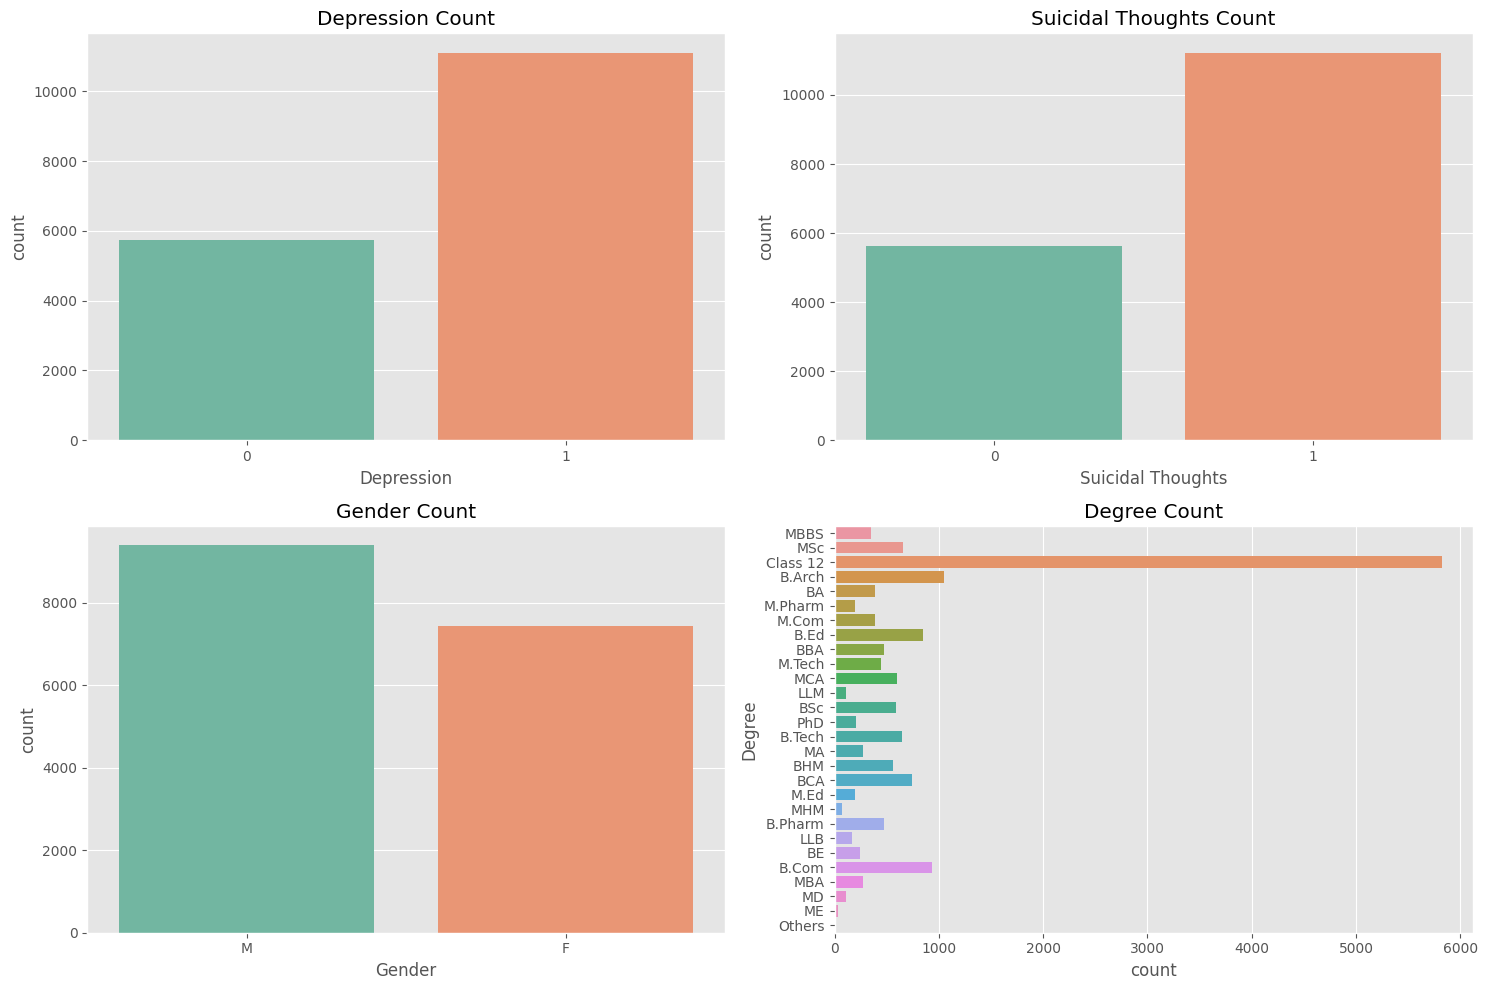

In [22]:
#Basic overview of the DataFrame through countplots
# 0 -> No Depression, 1 -> Depression
# 0 -> No Suicidal Thoughts, 1 -> Suicidal Thoughts
fig, axes = plt.subplots(2, 2, figsize=(15,10))

sns.countplot(data=df, x='Depression', ax=axes[0,0])
axes[0,0].set_title('Depression Count')

sns.countplot(data=df, x='Suicidal Thoughts', ax=axes[0,1])
axes[0,1].set_title('Suicidal Thoughts Count')

sns.countplot(data=df, x='Gender', ax=axes[1,0])
axes[1,0].set_title('Gender Count')

sns.countplot(data=df, y='Degree', ax=axes[1,1])
axes[1,1].set_title('Degree Count')

plt.tight_layout()
plt.show()


### 💡Gender-wise Distribution of Depression and Suicidal Thoughts

Are male and female students equally affected by depression and suicidal thoughts?  
Let’s visualize and compare the mental health condition distribution across gender.  


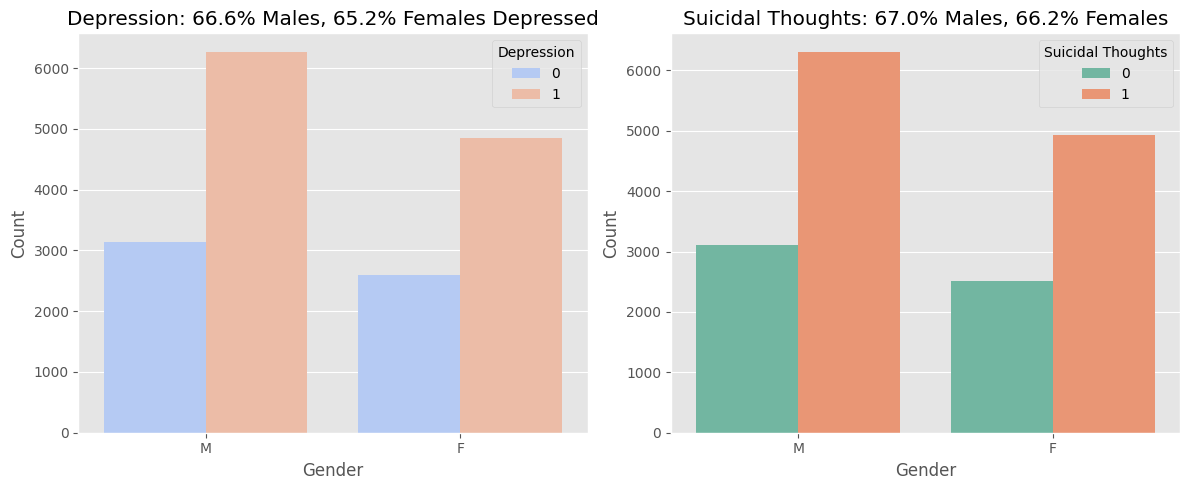

In [23]:
plt.figure(figsize=(12,5))

# Calculate percentages for Depression by Gender
depr_counts = df.groupby(['Gender', 'Depression']).size().unstack(fill_value=0)
depr_percent = (depr_counts[1] / depr_counts.sum(axis=1) * 100).round(1)

# Depression vs Gender
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='Gender', hue='Depression', palette='coolwarm')
plt.title(f"Depression: {depr_percent.get('M',0)}% Males, {depr_percent.get('F',0)}% Females Depressed")
plt.xlabel('Gender')
plt.ylabel('Count')

# Calculate percentages for Suicidal Thoughts by Gender
suic_counts = df.groupby(['Gender', 'Suicidal Thoughts']).size().unstack(fill_value=0)
suic_percent = (suic_counts[1] / suic_counts.sum(axis=1) * 100).round(1)

# Suicidal Thoughts vs Gender
plt.subplot(1, 2, 2)
sns.countplot(data=df, x='Gender', hue='Suicidal Thoughts', palette='Set2')
plt.title(f"Suicidal Thoughts: {suic_percent.get('M',0)}% Males, {suic_percent.get('F',0)}% Females")
plt.xlabel('Gender')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


### 🎯 Age vs Depression & Suicidal Thoughts

Mental health issues don’t affect all age groups equally. Some students are at a much higher risk than others due to developmental, academic, or social pressures.

Let’s explore which age group is most vulnerable to **depression** and **suicidal thoughts** among students.  
This analysis helps us **identify the most at-risk group**, enabling focused mental health interventions. 🧠⚠️

> 🔍 The age group with the **highest depression cases** is highlighted in the chart title below.


Students of Age:20, why are you all so depressed? 😭 But hey, we’re here for you sending hugs 🫂


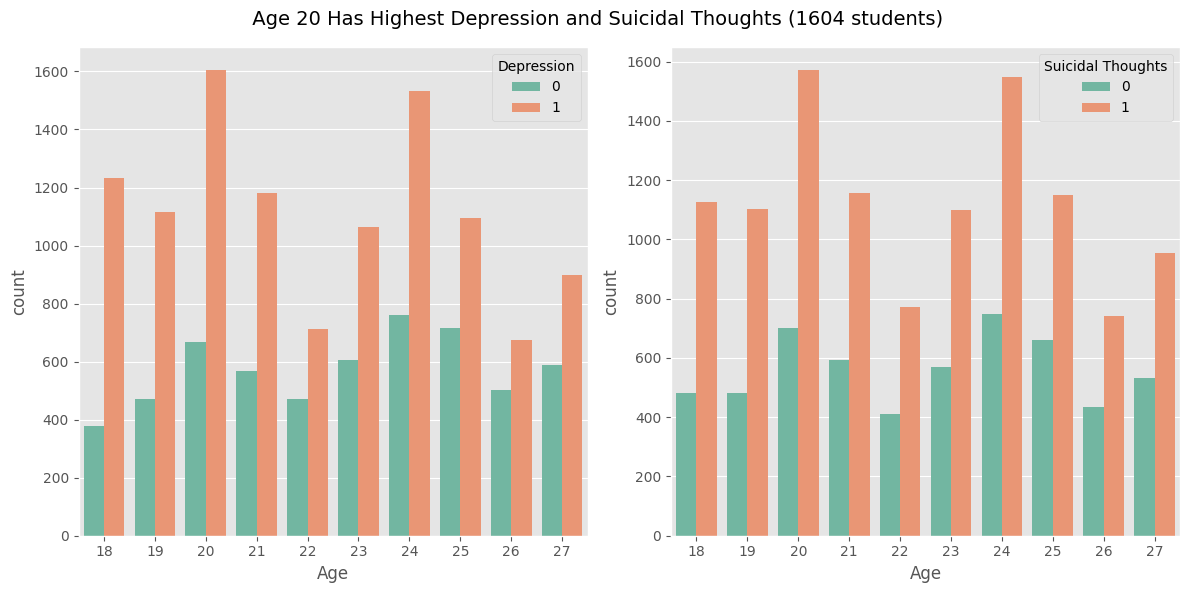

In [24]:
plt.figure(figsize=(12,6))


most_deprr_age = df.groupby(['Age'])['Depression'].value_counts().unstack(fill_value=0)
        

max_age = most_deprr_age[1].idxmax()
max_count = most_deprr_age[1].max()


print(f"Students of Age:{max_age}, why are you all so depressed? 😭 But hey, we’re here for you sending hugs 🫂")

plt.subplot(1,2,1)
sns.countplot(data=df , x='Age', hue='Depression')


plt.subplot(1,2,2)
sns.countplot(data=df , x='Age', hue='Suicidal Thoughts', palette='Set2')

plt.suptitle(f" Age {max_age} Has Highest Depression and Suicidal Thoughts ({max_count} students)", fontsize=14)
plt.tight_layout()
plt.show()





### 🎓 Which Degrees Face the Most Depression and Suicidal Thoughts?

Not all academic paths carry the same mental load.  
Let’s find out which degree programs have the **highest percentage** of students reporting depression and suicidal thoughts. 📊

The chart below reveals the **Top 20 degrees** where students are most affected.  
This can help institutions focus mental health resources where they’re needed most. ⚠️🧠


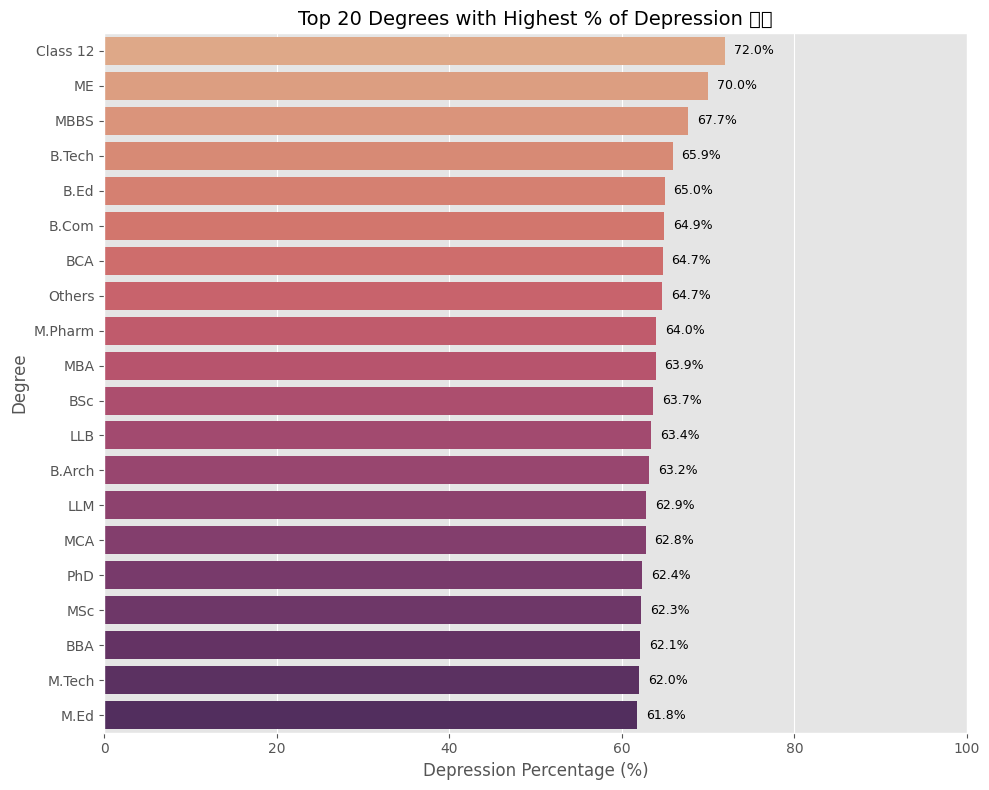

In [25]:
# Step 1: Calculate % of depressed students in each degree
degree_depression_pct = (
    df[df['Depression'] == 1]
    .groupby('Degree')
    .size() / df.groupby('Degree').size()
) * 100

# Step 2: Drop NaNs (if any) and sort
degree_depression_pct = degree_depression_pct.dropna().sort_values(ascending=False)

# Step 3: Take top 20
top_20_pct = degree_depression_pct.head(20)

# Step 4: Plot with labels
plt.figure(figsize=(10, 8))
barplot = sns.barplot(x=top_20_pct.values, y=top_20_pct.index, palette='flare')

# Add % labels on bars
for i, value in enumerate(top_20_pct.values):
    plt.text(value + 1, i, f"{value:.1f}%", va='center', fontsize=9)

plt.title('Top 20 Degrees with Highest % of Depression 🧠💔', fontsize=14)
plt.xlabel('Depression Percentage (%)')
plt.ylabel('Degree')
plt.xlim(0, 100)
plt.tight_layout()
plt.show()


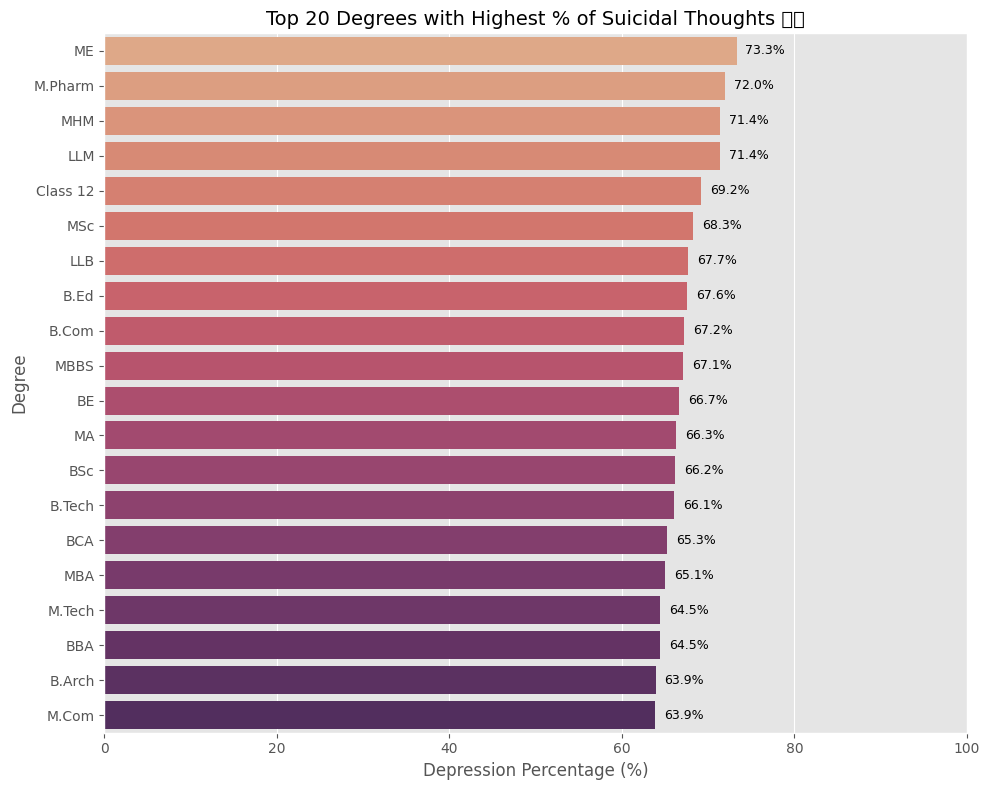

In [26]:
# Step 1: Calculate % of depressed students in each degree
degree_depression_pct = (
    df[df['Suicidal Thoughts'] == 1]
    .groupby('Degree')
    .size() / df.groupby('Degree').size()
) * 100

# Step 2: Drop NaNs (if any) and sort
degree_depression_pct = degree_depression_pct.dropna().sort_values(ascending=False)

# Step 3: Take top 20
top_20_pct = degree_depression_pct.head(20)

# Step 4: Plot with labels
plt.figure(figsize=(10, 8))
barplot = sns.barplot(x=top_20_pct.values, y=top_20_pct.index, palette='flare')

# Add % labels on bars
for i, value in enumerate(top_20_pct.values):
    plt.text(value + 1, i, f"{value:.1f}%", va='center', fontsize=9)

plt.title('Top 20 Degrees with Highest % of Suicidal Thoughts 🧠💔', fontsize=14)
plt.xlabel('Depression Percentage (%)')
plt.ylabel('Degree')
plt.xlim(0, 100)
plt.tight_layout()
plt.show()
